# 聚类分析
实验一组算法，不少于4个，至少包含一个基于划分的、一个基于层次的、一个基于密度的，具体的算法自行选择。对给定的数据集进行聚类分析。
实验数据集：控制图时间序列数据集、Epileptic Seizure Recognition Data。

In [53]:
# 初始化
import matplotlib.pyplot as plt
import numpy as np
import BinaryKMeans as BKM
import KMeans as KM
import AGNES as AS
import DBSCAN as DN
# 将图和数据内联在notebook里
%matplotlib inline
%load_ext autoreload
%autoreload 2
# 颜色列表
colValue = ['r', 'b', 'y','k']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 生成模拟数据

In [54]:
# 数据集：每三个是一组分别是西瓜的编号，密度，含糖量
data = '''
1,0.697,0.46,2,0.774,0.376,3,0.634,0.264,4,0.608,0.318,5,0.556,0.215,
6,0.403,0.237,7,0.481,0.149,8,0.437,0.211,9,0.666,0.091,10,0.243,0.267,
11,0.245,0.057,12,0.343,0.099,13,0.639,0.161,14,0.657,0.198,15,0.36,0.37,
16,0.593,0.042,17,0.719,0.103,18,0.359,0.188,19,0.339,0.241,20,0.282,0.257,
21,0.748,0.232,22,0.714,0.346,23,0.483,0.312,24,0.478,0.437,25,0.525,0.369,
26,0.751,0.489,27,0.532,0.472,28,0.473,0.376,29,0.725,0.445,30,0.446,0.459
'''
a = data.split(',')
dataset = np.array([(float(a[i]),float(a[i+1])) for i in range(1,len(a)-1,3)])

### K均值法

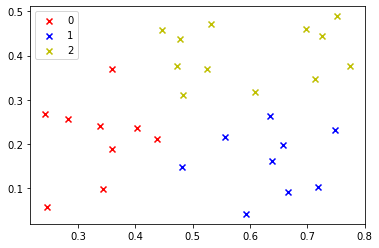

In [55]:
# 调用KMeans方法
centroids, centIndxDist=KM.kMeans(dataset,3)
idx=centIndxDist[:,0].astype(np.int32)
# 画图
for i in range(len(centroids)):
    plt.scatter(dataset[np.nonzero(idx==i),0],dataset[np.nonzero(idx==i),1],
                marker='x', c=colValue[i], label=i)
plt.legend(loc='upper left')
plt.show()

### 二分K均值法

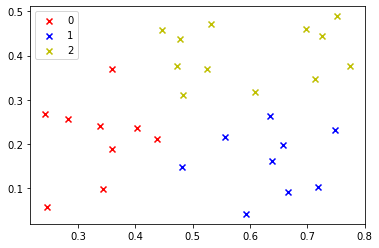

In [56]:
# 调用二分KMeans方法
centroids, centIndxDist=BKM.biKMeans(dataset,3)
# 画图
for i in range(len(centroids)):
    plt.scatter(dataset[np.nonzero(idx==i),0],dataset[np.nonzero(idx==i),1],
                marker='x', c=colValue[i], label=i)
plt.legend(loc='upper left')
plt.show()

### AGNES

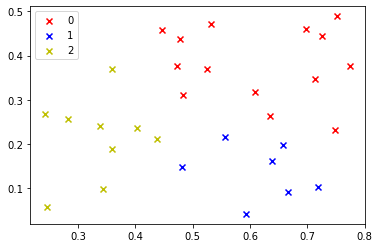

In [57]:
# 调用AGNES方法
C=AS.AGNES(dataset,3,'max')
# 画图
for i in range(len(C)):
    Ci=np.array(C[i])
    plt.scatter(Ci[:,0],Ci[:,1],
                marker='x', c=colValue[i], label=i)
plt.legend(loc='upper left')
plt.show()

### DBSCAN

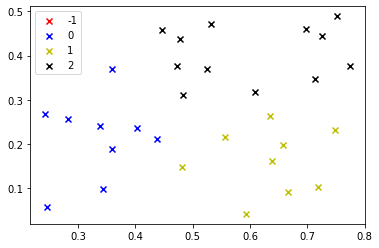

In [58]:
# 调用DBSCAN方法
a=DN.DBSCAN(dataset,0.1,4)
# 画图
for i in range(np.min(a),np.max(a)):
    plt.scatter(dataset[np.nonzero(idx==i),0],dataset[np.nonzero(idx==i),1],
                marker='x', c=colValue[i+1], label=i)
plt.legend(loc='upper left')
plt.show()
